# [비지도 학습]

## 1. K-Means (K-평균 군집화)

In [1]:
# 라이브러리 호출
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('./data/sales data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
len(data)

440

In [4]:
# 연속형 데이터와 명목형 데이터로 분류
categorical_features = ['Channel', 'Region'] # 명목형 데이터
continuous_features = ['Fresh', 'Milk', 'Grocery', 'Fronzen', 'Detergents_Paper', 'Delicassen'] # 연속형 데이터

for col in categorical_features:
    dummies = pd.get_dummies(data[col], prefix=col) # 명목형 데이터를 pd.get_dummies() 이용해서 one-hot encoding
    data = pd.concat([data, dummies], axis=1)
    data.drop(col, axis=1, inplace=True)

data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,0,1,0,0,1
1,7057,9810,9568,1762,3293,1776,0,1,0,0,1
2,6353,8808,7684,2405,3516,7844,0,1,0,0,1
3,13265,1196,4221,6404,507,1788,1,0,0,0,1
4,22615,5410,7198,3915,1777,5185,0,1,0,0,1


In [5]:
# 데이터 전처리
mms = MinMaxScaler()
data_transformed = mms.fit_transform(data)
#mms.fit(data)
#data_transformed = mms.transform(data)

C:\Users\AIFFEL\miniconda3\envs\torch_book\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\AIFFEL\miniconda3\envs\torch_book\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\AIFFEL\miniconda3\envs\torch_book\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\AIFFEL\miniconda3\envs\torch_book\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
 

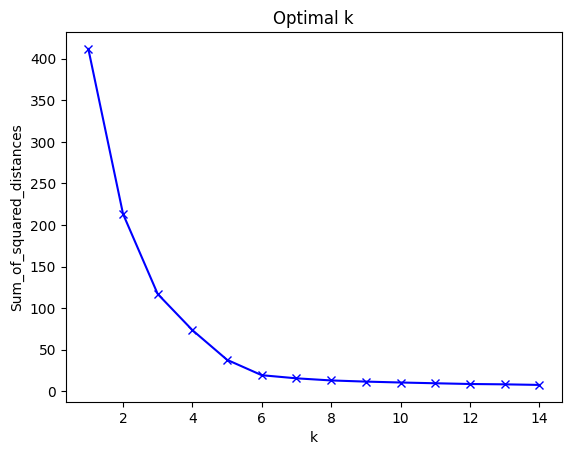

In [6]:
# 적당한 K값 추출
Sum_of_squared_distances = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Optimal k')
plt.show()